# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")


## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()


neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [25]:
# Calculate the mean number of housing units per year (hint: use groupby) 
df_sfo_data = pd.DataFrame(sfo_data.groupby(sfo_data.index).housing_units.mean())



In [26]:
#Calculate the standard Deviation of the dataframe 
df_sfo_data.std()

sale_price_sqr_foot     240.084910
housing_units          3823.506872
gross_rent             1068.961546
dtype: float64

In [27]:
#Calculate the minimum 
df_sfo_data.min()

neighborhood           Alamo Square
sale_price_sqr_foot         40.7726
housing_units                372560
gross_rent                     1239
dtype: object

In [28]:
#Calculate the maximum
df_sfo_data.max()

neighborhood           Yerba Buena
sale_price_sqr_foot         2258.7
housing_units               384242
gross_rent                    4390
dtype: object

In [29]:
# Save the dataframe as a csv file
df_sfo_data.to_csv('housing_units_per_year.csv')


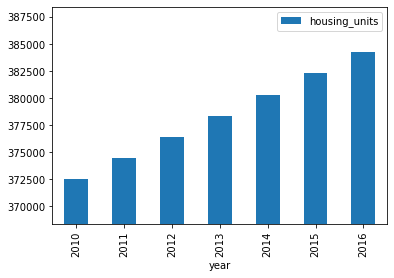

In [31]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
df_sfo_data.plot.bar(ylim = (df_sfo_data.housing_units.min() - df_sfo_data.housing_units.std(), df_sfo_data.housing_units.max() + df_sfo_data.housing_units.std()))


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [34]:
# Calculate the average sale price per square foot and average gross rent
average = sfo_data.groupby(sfo_data.index)[['sale_price_sqr_foot','gross_rent']].mean()
average

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

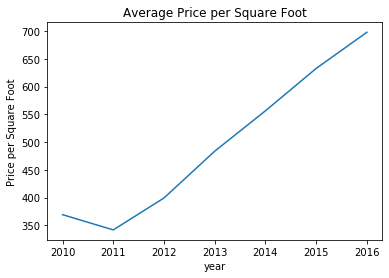

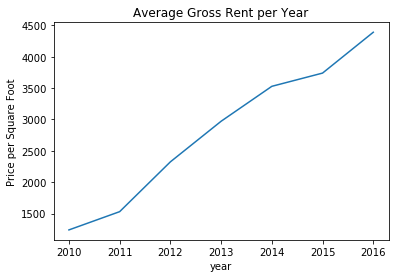

In [56]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average sale price per square foot
sales_linechart = average.sale_price_sqr_foot.plot(title = 'Average Price per Square Foot')
ylabel = plt.ylabel('Price per Square Foot')
plt.grid = True
plt.show()
# Line chart for average montly rent
gross_rent_linechart = average.gross_rent.plot(title = 'Average Gross Rent per Year')
ylabel = plt.ylabel('Price per Square Foot')
plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [66]:
# Group by year and neighborhood and then create a new dataframe of the mean values
df_mean_values = sfo_data[['sale_price_sqr_foot','neighborhood']].groupby([sfo_data.index, 'neighborhood']).mean().reset_index().dropna().sort_values(by = 'year')
df_mean_values

year                neighborhood  sale_price_sqr_foot
0    2010                Alamo Square           291.182945
32   2010                 Mission Bay           489.805378
33   2010             Mission Dolores           257.987999
34   2010             Mission Terrace           262.876026
35   2010                    Nob Hill           307.677477
..    ...                         ...                  ...
369  2016              Inner Richmond           403.311132
370  2016                Inner Sunset           445.923828
371  2016  Jordan Park/Laurel Heights           704.566419
361  2016                   Excelsior           534.226250
396  2016               Westwood Park           631.195426

[392 rows x 3 columns]

In [71]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
hvplot = sfo_data.hvplot.line(x = 'year', y = 'sale_price_sqr_foot', groupby = 'neighborhood', hover_cols = 'all')
hvplot

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot,neighborhood,housing_units,gross_rent)

In [77]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
df_hvplot = pd.DataFrame(sfo_data[['neighborhood','gross_rent']].groupby([sfo_data.index, 'neighborhood']).mean().reset_index().dropna().sort_values(by = 'year'))
hv_plot1 = df_hvplot.hvplot.line(x = 'year', y= 'gross_rent', groupby = 'neighborhood')
hv_plot1

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [81]:
# Getting the data from the top 10 expensive neighborhoods to own
expensive_to_own = pd.DataFrame(sfo_data.groupby(['neighborhood']).sale_price_sqr_foot.mean().sort_values(ascending = False).head(10).reset_index())
expensive_to_own

neighborhood  sale_price_sqr_foot
0  Union Square District           903.993258
1         Merced Heights           788.844818
2          Miraloma Park           779.810842
3        Pacific Heights           689.555817
4          Westwood Park           687.087575
5         Telegraph Hill           676.506578
6       Presidio Heights           675.350212
7             Cow Hollow           665.964042
8           Potrero Hill           662.013613
9            South Beach           650.124479

In [90]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_to_own_plot = expensive_to_own.hvplot.bar(x = 'neighborhood' , rot = 45, figsize =(40,30))
expensive_to_own_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [97]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
data = sfo_data.groupby(['year','neighborhood']).mean().drop(columns= 'housing_units')
data = data.reset_index()
hvplot2 = data.hvplot.bar(groupby = 'neighborhood' , x ='year', rot =45)
hvplot2

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [99]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_to_own_plot = expensive_to_own.hvplot.bar()
expensive_to_own_plot

:Bars   [index]   (sale_price_sqr_foot)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [108]:
# Load neighborhoods coordinates data
neighborhood_coordinates = pd.read_csv('Data/neighborhoods_coordinates.csv')
neighborhood_coordinates.columns = ['neighborhood','lon','lat']


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [109]:
# Calculate the mean values for each neighborhood
mean_values_neighborhood = pd.DataFrame(sfo_data.groupby(['neighborhood']).mean())
mean_values_neighborhood

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                       
Alamo Square                 366.020712      378401.00  2817.285714
Anza Vista                   373.382198      379050.00  3031.833333
Bayview                      204.588623      376454.00  2318.400000
Bayview Heights              590.792839      382295.00  3739.000000
Bernal Heights               576.746488      379374.50  3080.333333
...                                 ...            ...          ...
West Portal                  498.488485      376940.75  2515.500000
Western Addition             307.562201      377427.50  2555.166667
Westwood Highlands           533.703935      376454.00  2250.500000
Westwood Park                687.087575      382295.00  3959.000000
Yerba Buena                  576.709848      377427.50  2555.166667

[73 rows x 3 columns]

In [127]:
# Join the average values with the neighborhood locations
joined_average = pd.DataFrame(pd.merge(neighborhood_coordinates,mean_values_neighborhood , how = 'left', on = ['neighborhood','neighborhood']).dropna()) 
joined_average.head()

neighborhood        lon         lat  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
5  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
5       378076.5  2698.833333

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [128]:
# Set the mapbox access token
load_dotenv()
mapbox_api = os.getenv('MAPBOX_ACCESS_TOKEN')
# Create a scatter mapbox to analyze neighborhood info
mapbox = px.scatter_mapbox(joined_average, lat = 'lat' , lon = 'lon', size = "sale_price_sqr_foot", color = "neighborhood" , zoom = 10) 
mapbox.update_layout(mapbox_style="carto-positron")
mapbox.show()

#I cant figure out why I am getting the error I am getting.

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


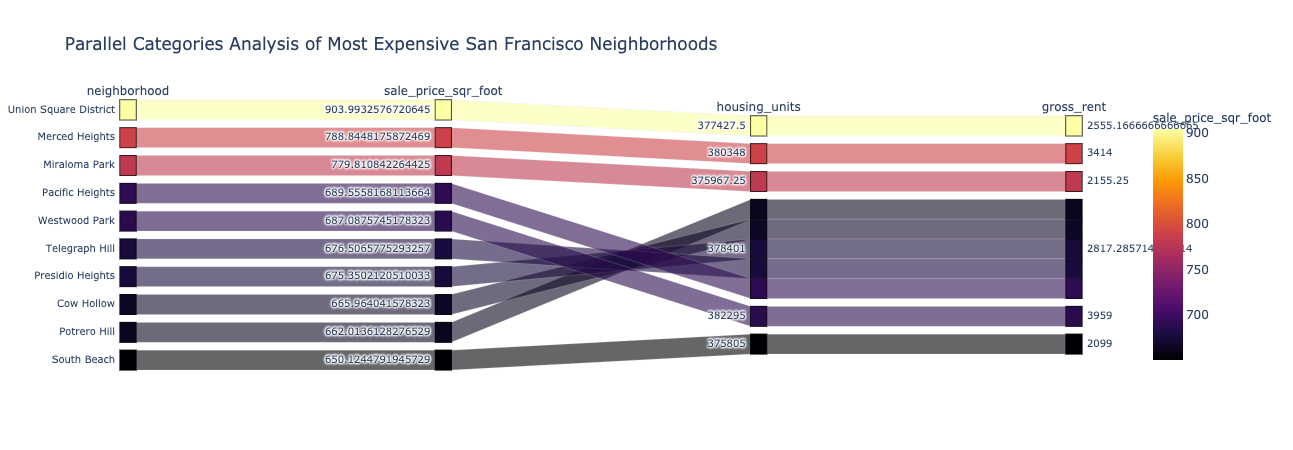

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

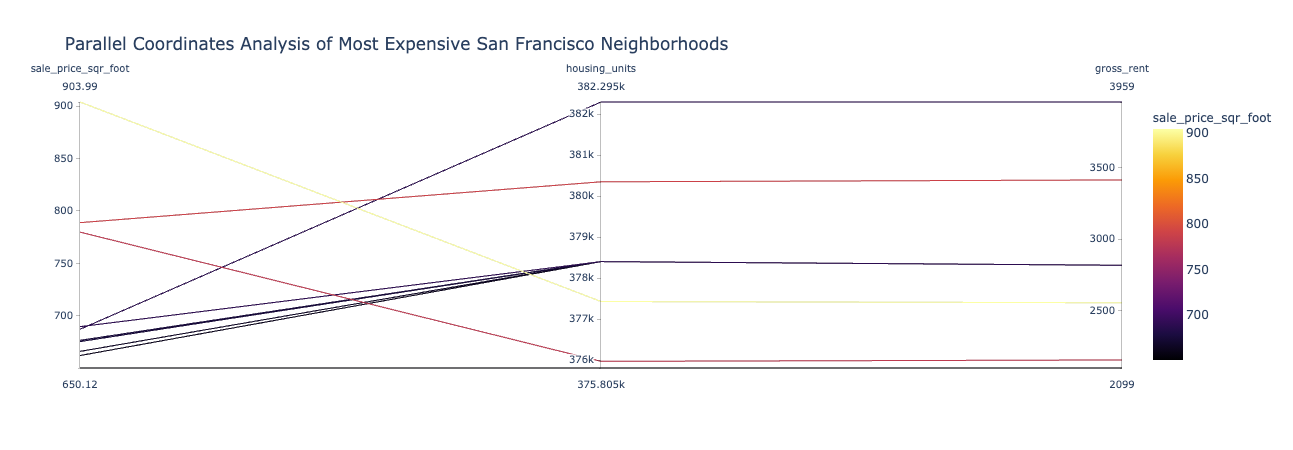

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

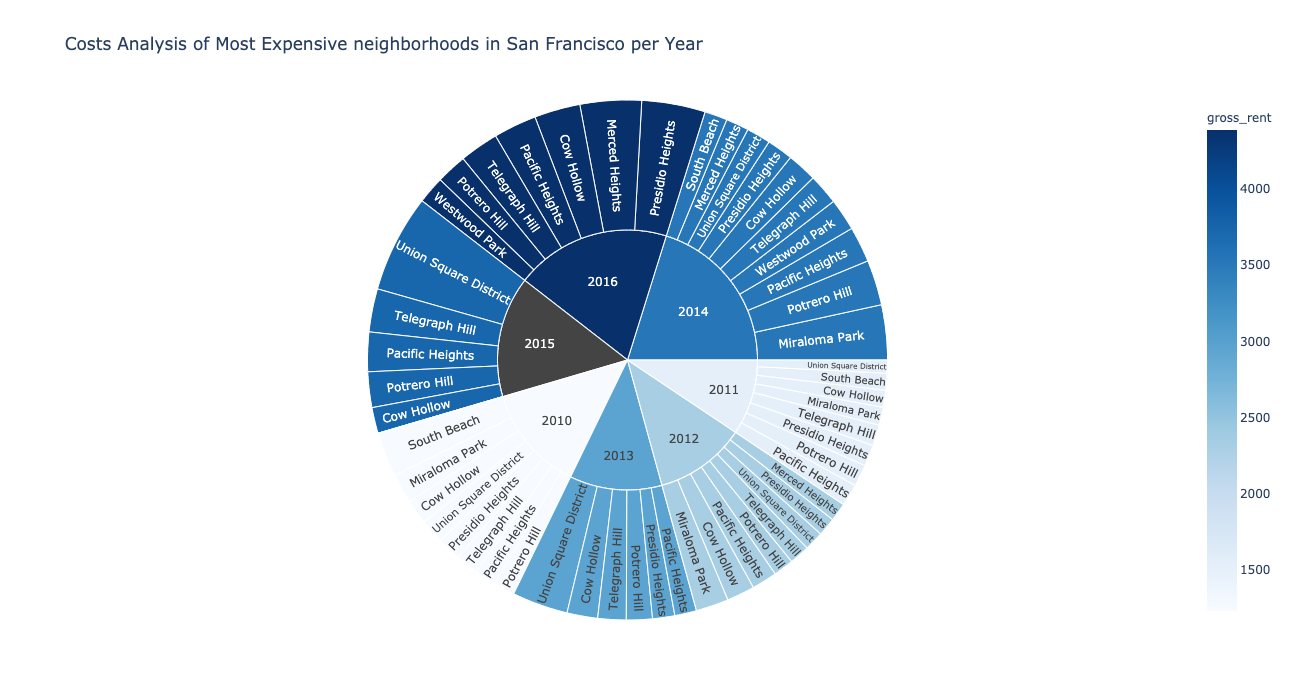

In [23]:
# Sunburst Plot
# YOUR CODE HERE!